## Решающие деревья, случайные леса и градиентный бустинг

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.  
3. В третьем разделе вы попробуете градиентный бустинг на практической задаче.

Прежде чем приступать к работе, рекомендую прочитать теорию.  
Построение решающего дерева осуществляется согласно базовому жадному алгоритму, описанному в [лекции 8](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения производиться по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Построение случайного леса описано в лекции [8](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture08-ensembles.pdf), про градиентный бустинг [9](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture09-ensembles.pdf), про стекинг и блендинг в лекции  [10](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture10-ensembles.pdf)

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

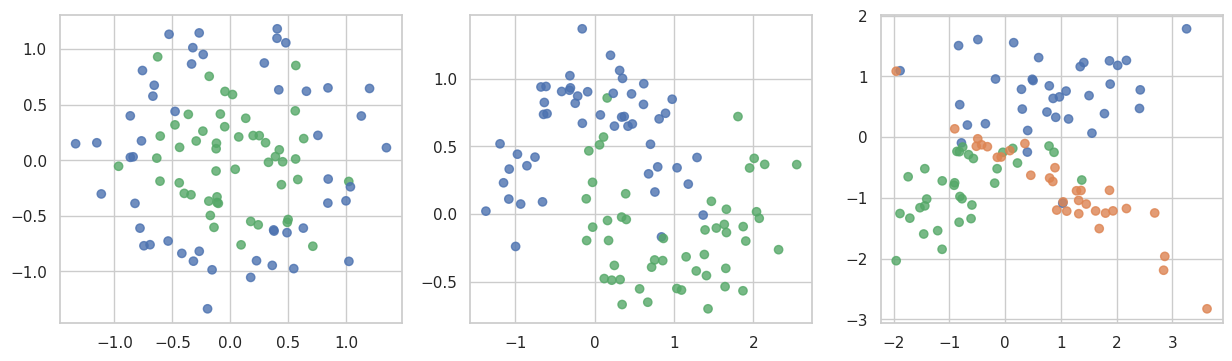

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1.1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

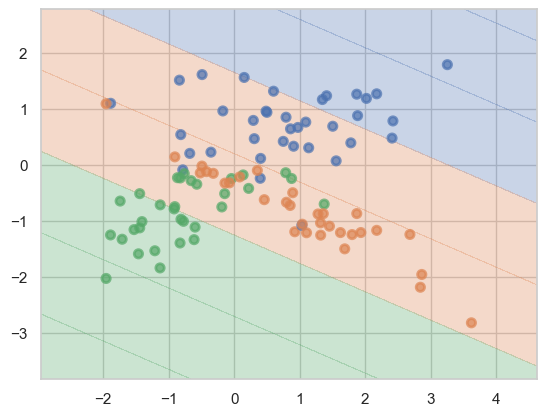

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Подготовка датасетов
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0
    )
]


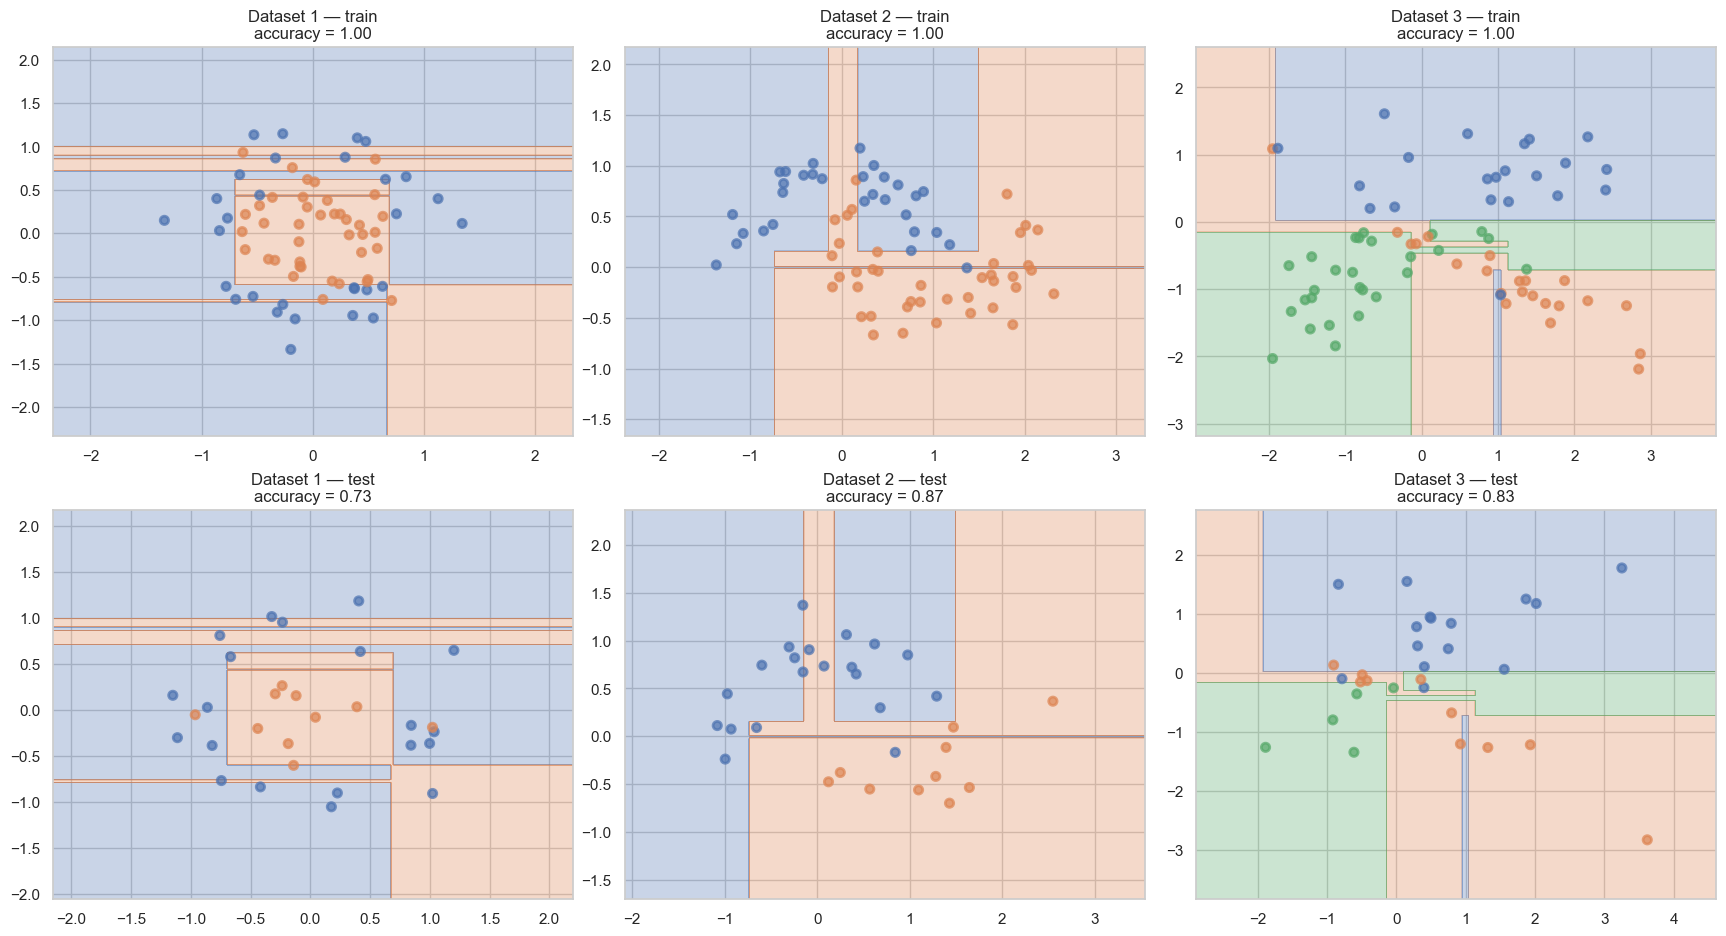

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.figure(figsize=(18, 10))

for i, (X, y) in enumerate(datasets):
    # разбиение на train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # дерево с параметрами по умолчанию
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # accuracy
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    # поверхность для train
    plt.subplot(2, 3, i + 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f"Dataset {i+1} — train\naccuracy = {train_acc:.2f}")

    # поверхность для test
    plt.subplot(2, 3, i + 4)
    plot_surface(clf, X_test, y_test)
    plt.title(f"Dataset {i+1} — test\naccuracy = {test_acc:.2f}")

plt.show()


__Ответ:__

__1.2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
param_sets = [
    {"max_depth": None, "min_samples_leaf": 1},   # без регуляризации
    {"max_depth": 5, "min_samples_leaf": 1},
    {"max_depth": 3, "min_samples_leaf": 1},
    {"max_depth": 3, "min_samples_leaf": 5},
    {"max_depth": 2, "min_samples_leaf": 10},
]


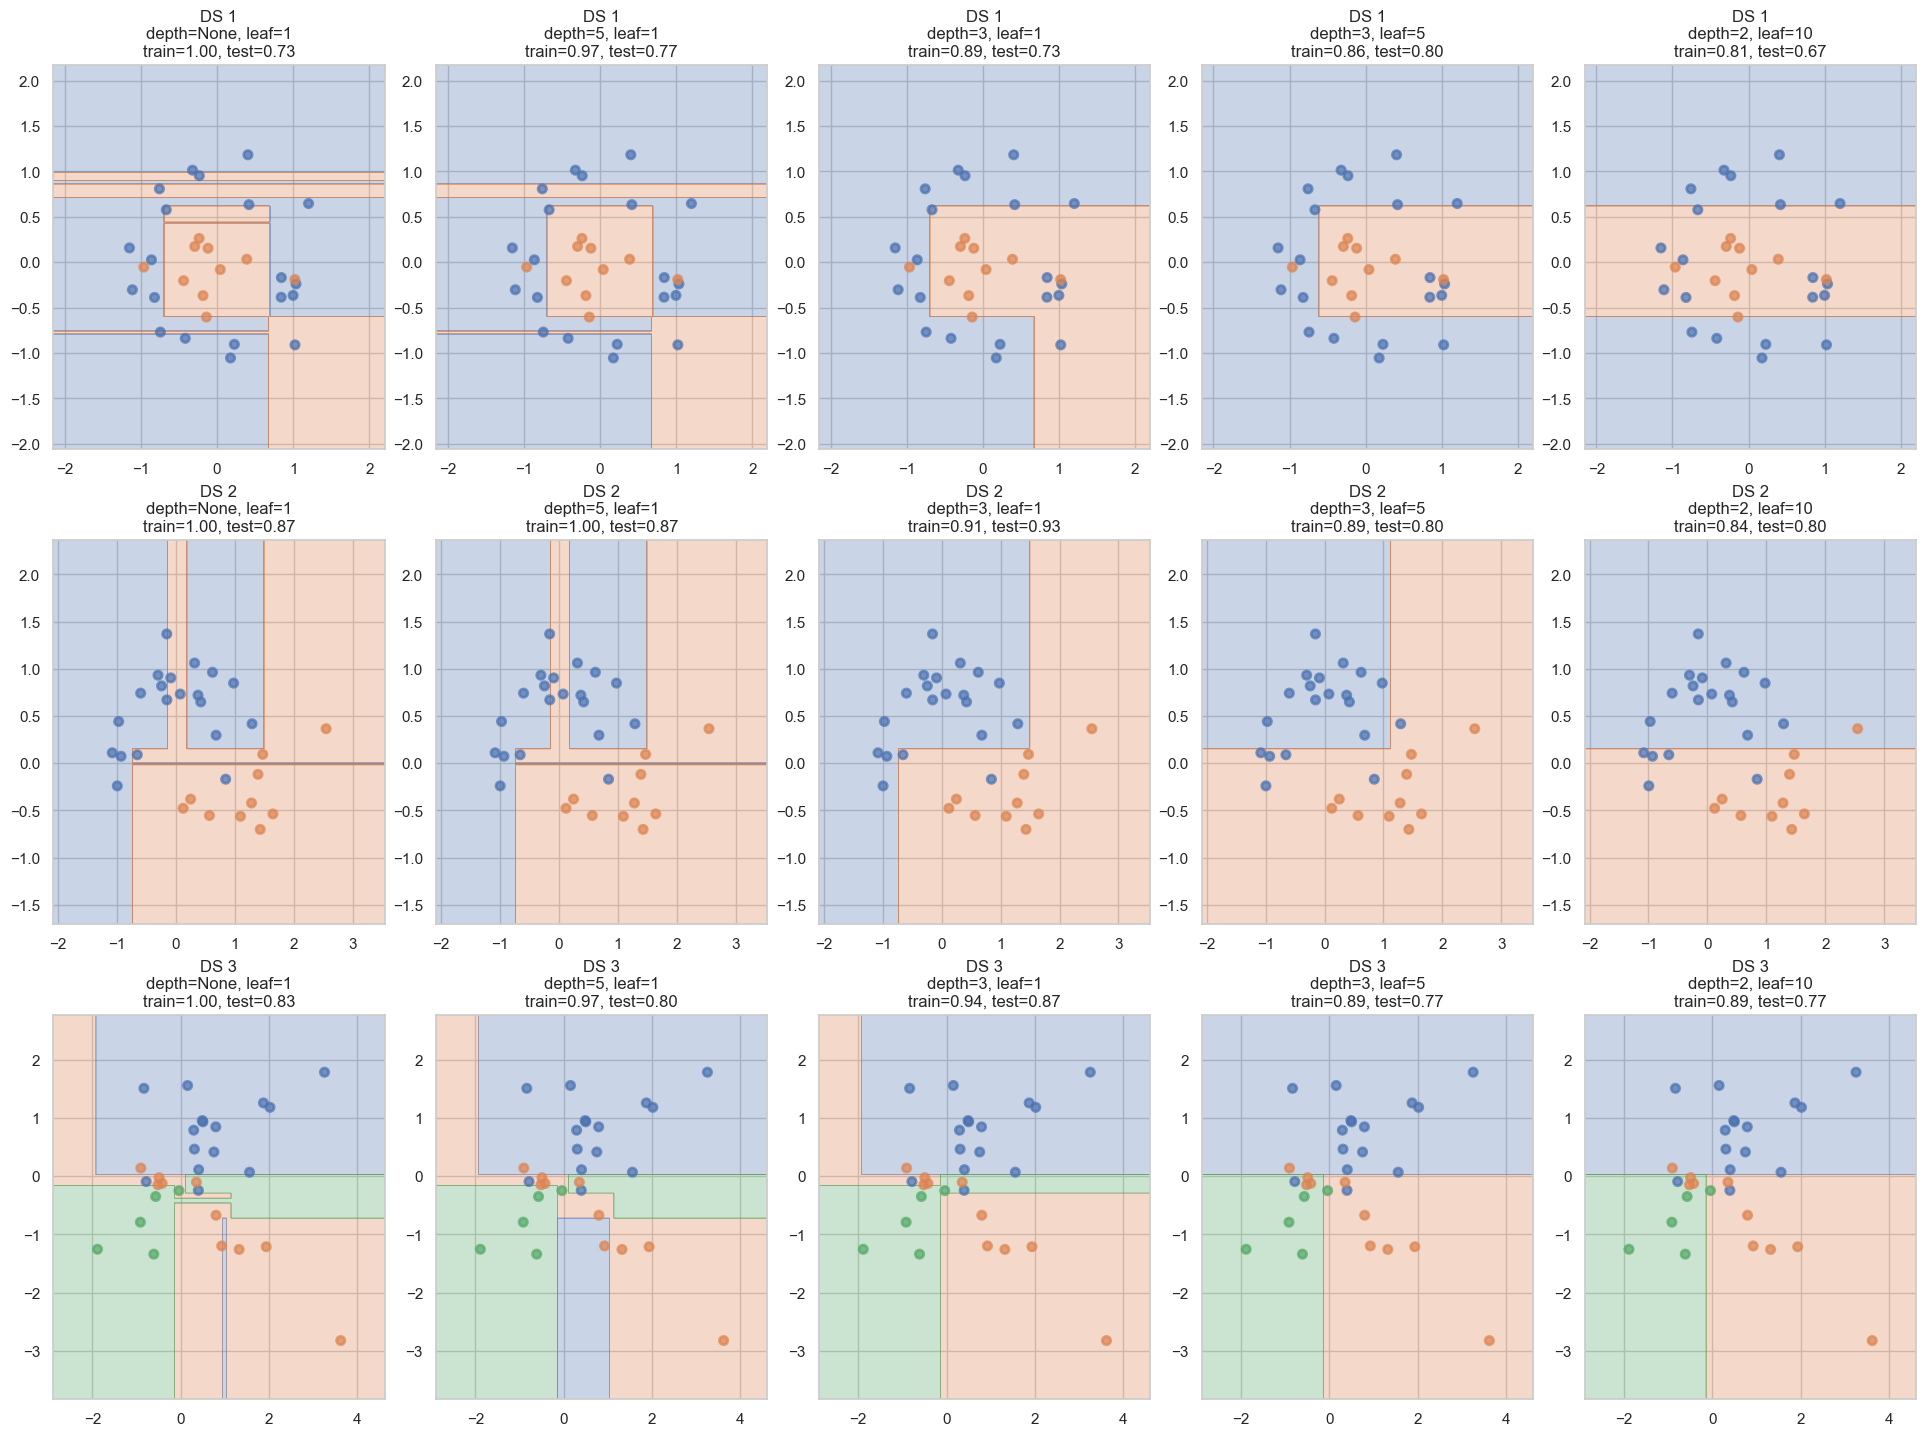

In [ ]:
plt.figure(figsize=(20, 15))

plot_id = 1

for dset_id, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    for params in param_sets:
        clf = DecisionTreeClassifier(
            random_state=42,
            **params
        )
        clf.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        plt.subplot(len(datasets), len(param_sets), plot_id)
        plot_surface(clf, X_test, y_test)
        plt.title(
            f"DS {dset_id+1}\n"
            f"depth={params['max_depth']}, leaf={params['min_samples_leaf']}\n"
            f"train={train_acc:.2f}, test={test_acc:.2f}"
        )

        plot_id += 1

plt.show()


При max_depth=None очень сложная, рваная граница. train = 1.00. max_depth ограничивает сложность модели


При уменьшении max_depth поверхность становится гладкой

min_samples_leaf запрещает мелкие разбиения
При большом min_samples_leaf дерево перестаёт реагировать на шум


__Ответ:__

Одинаково ли это для разных датасетов?

Для разных датасетов влияние регуляризации проявляется по-разному.

Для датасетов make_moons и make_circles, обладающих сложной нелинейной структурой, слишком сильная регуляризация приводит к недообучению и ухудшению качества на тестовой выборке.

для датасета make_classification умеренная регуляризация улучшает обобщающую способность модели, так как структура данных проще и лучше аппроксимируется деревом меньшей глубины.

# 2. Решающие деревья на 5 датасетах

__2.1. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [8]:
import zipfile

with zipfile.ZipFile("/content/mushroom.zip", "r") as z:
    z.namelist()


In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd

path = "/content/agaricus-lepiota.data"
data = pd.read_csv(path, header=None)
data.head()



,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
X = data.iloc[:, 1:] # все столбцы, кроме первого
y = data.iloc[:, 0] # первый столбец

In [11]:
from sklearn.preprocessing import LabelEncoder

X_enc = X.copy()
for col in X.columns:
    le = LabelEncoder()
    X_enc[col] = le.fit_transform(X[col])

le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)

# train / test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.5, random_state=42
)

# дерево
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test))
acc

1.0

In [12]:
clf.get_depth()


7

__2.2. (2 балла)__

Загрузите следующие наборы данных (все датасеты уже скачаны для удобства в папку datasets), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).
* [user-knowledge-modeling](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling) (классы не бинарные: High, Middle, Low, very_low)

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassifier, считающий все признаки категориальными
* DecisionTreeClassifier, считающий все признаки вещественными + one-hot-encoding всех признаков  

Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder.

In [51]:
import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
import warnings
warnings.filterwarnings('ignore')

def extract_zip(zip_path, target_file=None):
    """Распаковывает файл из архива и возвращает путь к файлу"""
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"Архив {zip_path} не найден")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Получаем список файлов в архиве
        file_list = zip_ref.namelist()

        if target_file:
            # Ищем конкретный файл
            for file in file_list:
                if target_file.lower() in file.lower():
                    zip_ref.extract(file, 'datasets_extracted')
                    return os.path.join('datasets_extracted', file)
        else:
            # Извлекаем первый файл
            zip_ref.extractall('datasets_extracted')
            return os.path.join('datasets_extracted', file_list[0])

    raise FileNotFoundError(f"Файл не найден в архиве {zip_path}")

def load_mushrooms():
    """Загрузка mushrooms датасета из архива"""
    # Распаковываем
    data_file = extract_zip('/content/mushroom.zip', 'agaricus-lepiota.data')

    column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                    'stalk-surface-below-ring', 'stalk-color-above-ring',
                    'stalk-color-below-ring', 'veil-type', 'veil-color',
                    'ring-number', 'ring-type', 'spore-print-color',
                    'population', 'habitat']

    df = pd.read_csv(data_file, header=None, names=column_names)
    X = df.drop('class', axis=1)
    y = df['class'].apply(lambda x: 0 if x == 'e' else 1)  # e=0, p=1

    dataset_info = {
        'name': 'mushrooms',
        'X': X,
        'y': y,
        'categorical_features': list(range(X.shape[1])),  # все признаки категориальные
        'binary': True
    }
    return dataset_info

def load_tic_tac_toe():
    """Загрузка tic-tac-toe датасета из архива"""
    data_file = extract_zip('/content/tic-tac-toe.zip', 'tic-tac-toe.data')

    column_names = ['top-left', 'top-middle', 'top-right',
                    'middle-left', 'middle-middle', 'middle-right',
                    'bottom-left', 'bottom-middle', 'bottom-right',
                    'class']

    df = pd.read_csv(data_file, header=None, names=column_names)
    X = df.drop('class', axis=1)
    y = df['class'].apply(lambda x: 0 if x == 'negative' else 1)  # negative=0, positive=1

    dataset_info = {
        'name': 'tic-tac-toe',
        'X': X,
        'y': y,
        'categorical_features': list(range(X.shape[1])),  # все признаки категориальные
        'binary': True
    }
    return dataset_info

def load_cars():
    """Загрузка cars датасета из архива"""
    data_file = extract_zip('/content/cars.zip', 'car.data')

    column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

    df = pd.read_csv(data_file, header=None, names=column_names)
    X = df.drop('class', axis=1)

    # Кодируем классы: unacc, acc -> 0; good, vgood -> 1
    def encode_class(c):
        if c in ['unacc', 'acc']:
            return 0
        else:  # good, vgood
            return 1

    y = df['class'].apply(encode_class)

    dataset_info = {
        'name': 'cars',
        'X': X,
        'y': y,
        'categorical_features': list(range(X.shape[1])),  # все признаки категориальные
        'binary': True
    }
    return dataset_info

def load_nursery():
    """Загрузка nursery датасета из архива"""
    data_file = extract_zip('/content/nursery.zip', 'nursery.data')

    column_names = ['parents', 'has_nurs', 'form', 'children', 'housing',
                    'finance', 'social', 'health', 'class']

    df = pd.read_csv(data_file, header=None, names=column_names)
    X = df.drop('class', axis=1)

    # Кодируем классы: not_recom, recommend -> 0; very_recom, priority, spec_prior -> 1
    def encode_class(c):
        if c in ['not_recom', 'recommend']:
            return 0
        else:  # very_recom, priority, spec_prior
            return 1

    y = df['class'].apply(encode_class)

    dataset_info = {
        'name': 'nursery',
        'X': X,
        'y': y,
        'categorical_features': list(range(X.shape[1])),  # все признаки категориальные
        'binary': True
    }
    return dataset_info

def load_user_knowledge():
    """Корректная загрузка user-knowledge датасета"""
    data_file = extract_zip('/content/user-knowledge-modeling.zip', 'Data_User_Modeling')

    # 1. Читаем как Excel с заголовком
    df = pd.read_excel(data_file, header=0)

    # 2. Берем первые 5 столбцов как признаки
    X = df.iloc[:, :5]

    # 3. Конвертируем запятые в точки для десятичных чисел
    for col in X.columns:
        if X[col].dtype == object:
            X[col] = X[col].astype(str).str.replace(',', '.')
        X[col] = pd.to_numeric(X[col], errors='coerce')

    X = X.fillna(0)

    # 4. Целевая переменная - столбец 'UNS'
    y_series = df['UNS'] if 'UNS' in df.columns else df.iloc[:, -1]

    # 5. Преобразуем метки в числа
    y_series = y_series.astype(str).str.strip().str.lower()
    label_mapping = {'very_low': 0, 'low': 1, 'middle': 2, 'high': 3}
    y = y_series.map(label_mapping).fillna(0).astype(int)

    return {
        'name': 'user-knowledge',
        'X': X,
        'y': y,
        'categorical_features': [],
        'binary': False
    }
    return dataset_info

# ========== ФУНКЦИИ ПРЕОБРАЗОВАНИЯ ПРИЗНАКОВ ==========

def encode_numerical(X, y, categorical_features):
    """Вариант 1: Все признаки как вещественные (LabelEncoder для категориальных)"""
    X_encoded = X.copy()

    for col_idx in categorical_features:
        col_name = X.columns[col_idx]
        if X_encoded[col_name].dtype == object:
            le = LabelEncoder()
            X_encoded[col_name] = le.fit_transform(X_encoded[col_name].astype(str))

    return X_encoded.values

def encode_categorical(X, y, categorical_features):
    """Вариант 2: Все признаки как категориальные"""
    # В sklearn нет прямой поддержки категориальных признаков в деревьях
    # Используем тот же подход, что и в варианте 1
    return encode_numerical(X, y, categorical_features)

def encode_one_hot(X, y, categorical_features):
    """Вариант 3: One-hot encoding для всех признаков"""
    X_encoded = X.copy()

    # Определяем категориальные и числовые столбцы
    categorical_cols = [X.columns[i] for i in categorical_features
                       if X.columns[i] in X.columns and X[X.columns[i]].dtype == object]
    numerical_cols = [col for col in X.columns if col not in categorical_cols]

    if len(categorical_cols) > 0:
        # Применяем OneHotEncoder
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

        # Преобразуем категориальные признаки в строки
        X_cat = X[categorical_cols].astype(str)
        encoded_categorical = encoder.fit_transform(X_cat)

        # Создаем имена для новых столбцов
        encoded_columns = []
        for i, col in enumerate(categorical_cols):
            for category in encoder.categories_[i]:
                encoded_columns.append(f"{col}_{category}")

        # Создаем DataFrame с one-hot признаками
        encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)

        # Объединяем с числовыми признаками
        if len(numerical_cols) > 0:
            numerical_df = X[numerical_cols].reset_index(drop=True)
            numerical_df = numerical_df.apply(pd.to_numeric, errors='coerce').fillna(0)
            X_final = pd.concat([numerical_df, encoded_df], axis=1)
        else:
            X_final = encoded_df
    else:
        # Нет категориальных признаков
        X_final = X_encoded

    # Преобразуем все в float
    for col in X_final.columns:
        X_final[col] = pd.to_numeric(X_final[col], errors='coerce')

    X_final = X_final.fillna(0)
    return X_final.values

# ========== ОСНОВНАЯ ЧАСТЬ ==========

# Создаем директорию для распакованных файлов
if not os.path.exists('datasets_extracted'):
    os.makedirs('datasets_extracted')

print("РАСПАКОВКА И ЗАГРУЗКА ДАННЫХ")

# Загружаем все датасеты
datasets = []
datasets_to_load = [
    ('mushrooms.zip', load_mushrooms),
    ('tic-tac-toe.zip', load_tic_tac_toe),
    ('cars.zip', load_cars),
    ('nursery.zip', load_nursery),
    ('user-knowledge-modeling.zip', load_user_knowledge)
]

for zip_file, loader_func in datasets_to_load:
    try:
        print(f"\nЗагрузка {zip_file}...")
        dataset = loader_func()
        datasets.append(dataset)
        print(f"  ✓ Успешно загружено: {dataset['name']}")
        print(f"    Признаков: {dataset['X'].shape[1]}, Объектов: {dataset['X'].shape[0]}")
    except Exception as e:
        print(f"  ✗ Ошибка при загрузке {zip_file}: {e}")
        # Создаем заглушку, чтобы код продолжал работать
        datasets.append({
            'name': zip_file.replace('.zip', ''),
            'X': pd.DataFrame({'dummy': [0, 1]}),
            'y': pd.Series([0, 1]),
            'categorical_features': [],
            'binary': True
        })

print("СВОДКА ПО ДАТАСЕТАМ")
for dataset in datasets:
    print(f"{dataset['name']:20} | Признаков: {dataset['X'].shape[1]:3d} | "
          f"Объектов: {dataset['X'].shape[0]:5d} | "
          f"Категориальных: {len(dataset['categorical_features']):2d} | "
          f"Классов: {len(np.unique(dataset['y'])):2d}")

# Создаем scorers
scorer = make_scorer(accuracy_score)

# Результаты
results = {
    'dataset': [],
    'numerical': [],     # Вариант 1
    'categorical': [],   # Вариант 2
    'one_hot': []        # Вариант 3
}

print("КРОСС-ВАЛИДАЦИЯ (cv=10)")

# Для каждого датасета проводим кросс-валидацию
for dataset in datasets:
    print(f"\nДатасет: {dataset['name']}")
    print("-" * 50)

    X = dataset['X']
    y = dataset['y'].values
    categorical_features = dataset['categorical_features']

    try:
        # Вариант 1: Все признаки как вещественные
        X_num = encode_numerical(X, y, categorical_features)
        if X_num.shape[1] == 0:
            print("  Пропускаем: нет признаков после преобразования")
            continue

        tree_num = DecisionTreeClassifier(random_state=42, max_depth=10)
        scores_num = cross_val_score(tree_num, X_num, y, cv=10, scoring=scorer)
        mean_score_num = scores_num.mean()
        std_score_num = scores_num.std()
        print(f"  Вещественные:     {mean_score_num:.4f} ± {std_score_num:.4f}")

        # Вариант 2: Все признаки как категориальные
        X_cat = encode_categorical(X, y, categorical_features)
        tree_cat = DecisionTreeClassifier(random_state=42, max_depth=10)
        scores_cat = cross_val_score(tree_cat, X_cat, y, cv=10, scoring=scorer)
        mean_score_cat = scores_cat.mean()
        std_score_cat = scores_cat.std()
        print(f"  Категориальные:   {mean_score_cat:.4f} ± {std_score_cat:.4f}")

        # Вариант 3: One-hot encoding
        X_onehot = encode_one_hot(X, y, categorical_features)
        if X_onehot.shape[1] > 1000:  # Если слишком много признаков
            tree_onehot = DecisionTreeClassifier(random_state=42, max_depth=5)
        else:
            tree_onehot = DecisionTreeClassifier(random_state=42, max_depth=10)

        scores_onehot = cross_val_score(tree_onehot, X_onehot, y, cv=10, scoring=scorer)
        mean_score_onehot = scores_onehot.mean()
        std_score_onehot = scores_onehot.std()
        print(f"  One-hot:          {mean_score_onehot:.4f} ± {std_score_onehot:.4f}")

        # Сохраняем результаты
        results['dataset'].append(dataset['name'])
        results['numerical'].append(mean_score_num)
        results['categorical'].append(mean_score_cat)
        results['one_hot'].append(mean_score_onehot)

    except Exception as e:
        print(f"  Ошибка: {e}")
        results['dataset'].append(dataset['name'])
        results['numerical'].append(np.nan)
        results['categorical'].append(np.nan)
        results['one_hot'].append(np.nan)

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)
results_df = results_df.set_index('dataset')

print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
print(results_df.to_string(float_format=lambda x: f"{x:.4f}" if not pd.isna(x) else "N/A"))

# Анализ
print("АНАЛИЗ РЕЗУЛЬТАТОВ")

# Для корректного сравнения удалим строки с NaN
valid_results = results_df.dropna()

if len(valid_results) > 0:
    # Добавим столбец с лучшим методом
    valid_results['best_method'] = valid_results[['numerical', 'categorical', 'one_hot']].idxmax(axis=1)
    valid_results['best_score'] = valid_results[['numerical', 'categorical', 'one_hot']].max(axis=1)

    print("\nЛУЧШИЙ МЕТОД ДЛЯ КАЖДОГО ДАТАСЕТА:")
    print("-" * 60)
    for idx, row in valid_results.iterrows():
        print(f"{idx:20} | {row['best_method']:12} | {row['best_score']:.4f}")

    # Подсчет сколько раз каждый метод был лучшим
    best_counts = valid_results['best_method'].value_counts()
    print(f"\nМЕТОДЫ ПОБЕДИЛИ:")
    for method, count in best_counts.items():
        print(f"  {method:12}: {count} раз")
else:
    print("Нет валидных результатов для анализа")

# Очистка временных файлов (опционально)
import shutil
if os.path.exists('datasets_extracted'):
    shutil.rmtree('datasets_extracted')
    print("\nВременные файлы удалены")

РАСПАКОВКА И ЗАГРУЗКА ДАННЫХ

Загрузка mushrooms.zip...
  ✓ Успешно загружено: mushrooms
    Признаков: 22, Объектов: 8124

Загрузка tic-tac-toe.zip...
  ✓ Успешно загружено: tic-tac-toe
    Признаков: 9, Объектов: 958

Загрузка cars.zip...
  ✓ Успешно загружено: cars
    Признаков: 6, Объектов: 1728

Загрузка nursery.zip...
  ✓ Успешно загружено: nursery
    Признаков: 8, Объектов: 12960

Загрузка user-knowledge-modeling.zip...
  ✓ Успешно загружено: user-knowledge
    Признаков: 3, Объектов: 12
СВОДКА ПО ДАТАСЕТАМ
mushrooms            | Признаков:  22 | Объектов:  8124 | Категориальных: 22 | Классов:  2
tic-tac-toe          | Признаков:   9 | Объектов:   958 | Категориальных:  9 | Классов:  2
cars                 | Признаков:   6 | Объектов:  1728 | Категориальных:  6 | Классов:  2
nursery              | Признаков:   8 | Объектов: 12960 | Категориальных:  8 | Классов:  2
user-knowledge       | Признаков:   3 | Объектов:    12 | Категориальных:  0 | Классов:  1
КРОСС-ВАЛИДАЦИЯ (cv=10)

__2.3. (бонус, 1 балл)__

Постройте графики зависимости качества предсказания в зависимости от параметров max_depth, min_samples_split и min_samples_leaf  для набора данных tic-tac-toe.

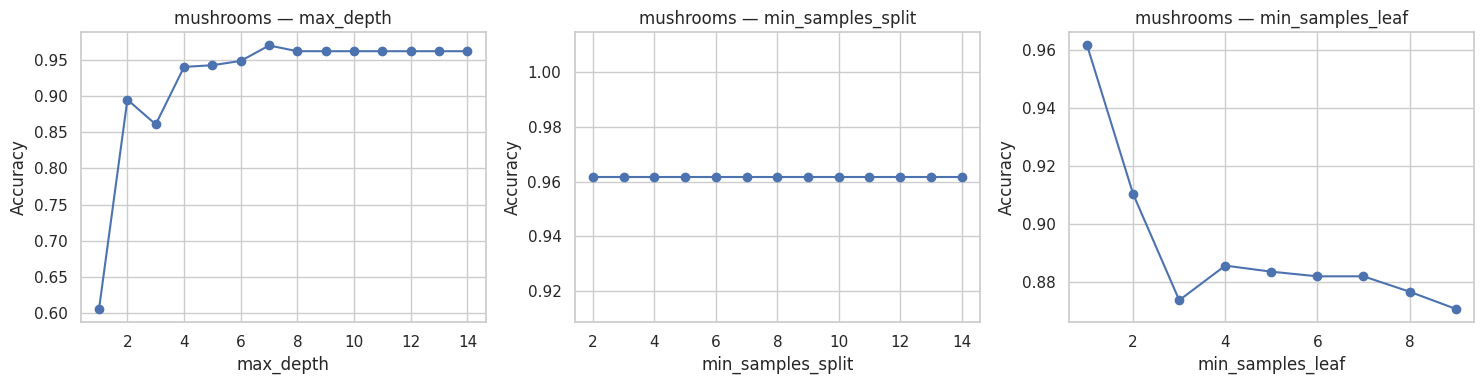

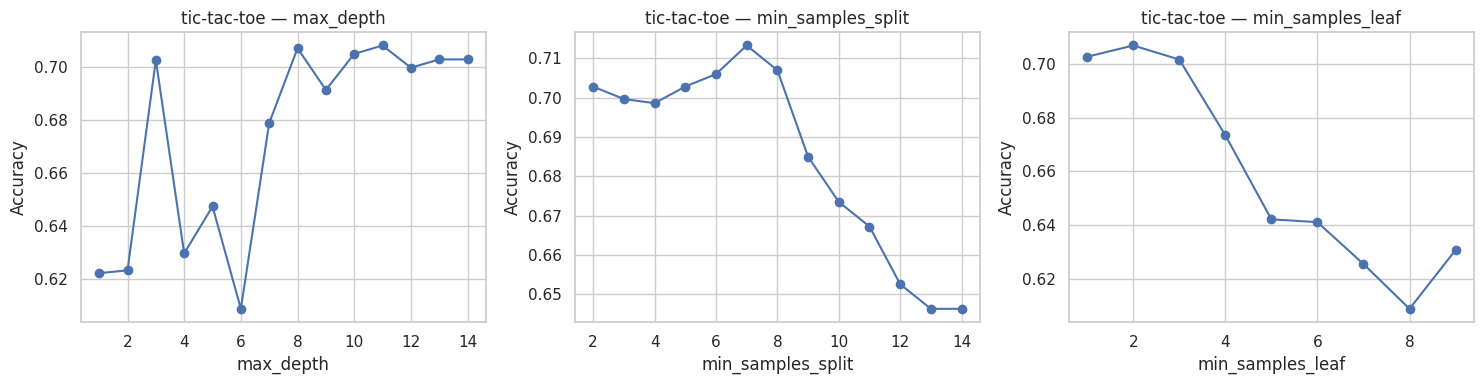

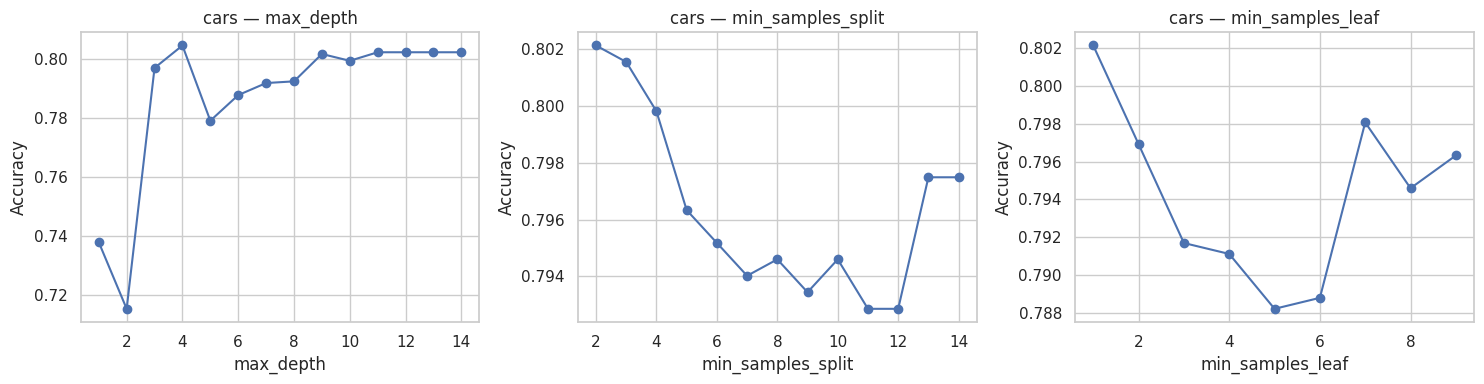

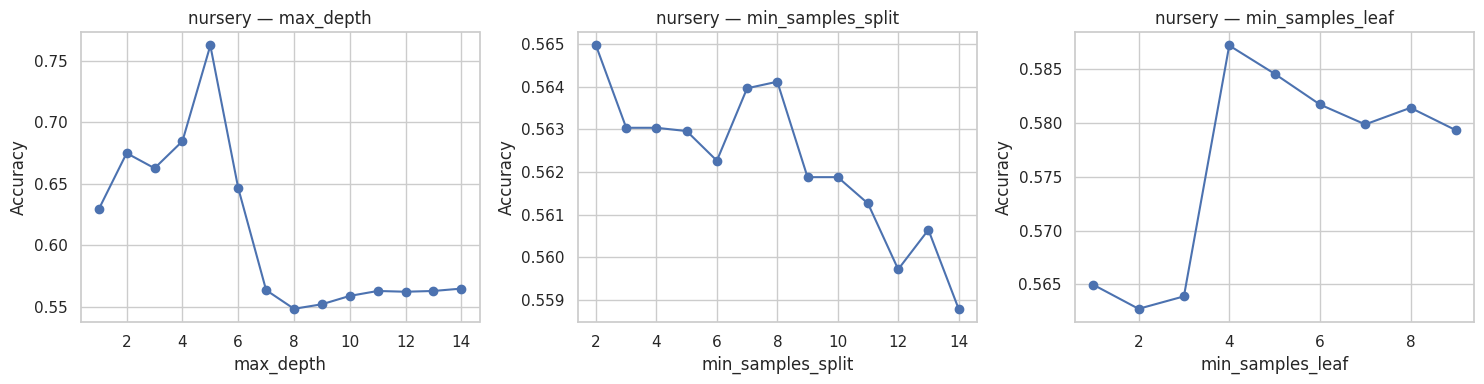

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_classes.py", line 1024, in fit
    super()._fit(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2956, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Area: Education'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_classes.py", line 1024, in fit
    super()._fit(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2956, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Number of Instances: 403'


<Figure size 1500x400 with 0 Axes>

In [26]:
datasets = {
    "mushrooms": (X_mush, y_mush),
    "tic-tac-toe": (X_ttt, y_ttt),
    "cars": (X_cars, y_cars),
    "nursery": (X_nursery, y_nursery),
    "user-knowledge": (X_ukm, y_ukm)
}

params = {
    "max_depth": range(1, 15),
    "min_samples_split": range(2, 15),
    "min_samples_leaf": range(1, 10)
}

for name, (X, y) in datasets.items():
    plt.figure(figsize=(15,4))
    for i, (param_name, values) in enumerate(params.items()):
        scores = []
        for val in values:
            clf = DecisionTreeClassifier(**{param_name: val}, random_state=42)
            score = cross_val_score(clf, X, y, cv=5).mean()
            scores.append(score)
        plt.subplot(1, 3, i+1)
        plt.plot(values, scores, marker='o')
        plt.title(f"{name} — {param_name}")
        plt.xlabel(param_name)
        plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


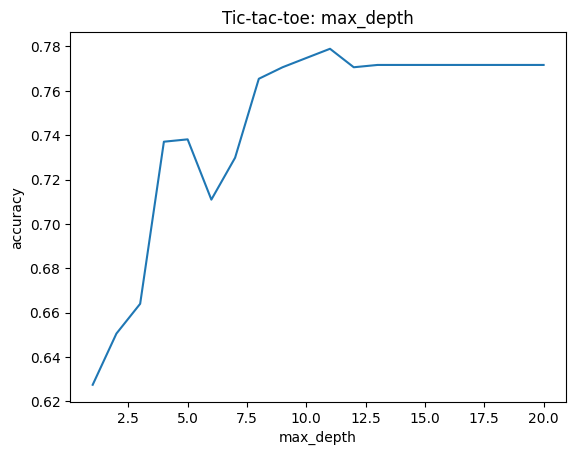

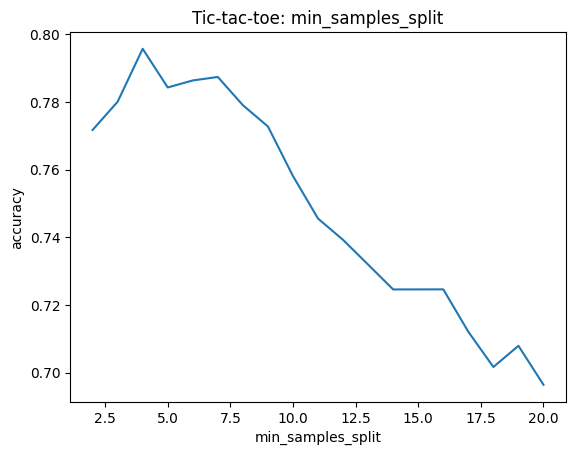

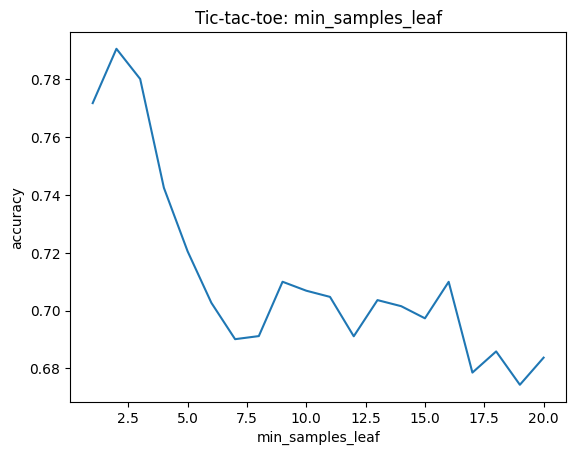

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# диапазоны параметров
max_depths = range(1, 21)
min_samples_split_vals = range(2, 21)
min_samples_leaf_vals = range(1, 21)

scores_depth = []
scores_split = []
scores_leaf = []

# max_depth
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    score = cross_val_score(clf, X_ttt, y_ttt, cv=10).mean()
    scores_depth.append(score)

# min_samples_split
for s in min_samples_split_vals:
    clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    score = cross_val_score(clf, X_ttt, y_ttt, cv=10).mean()
    scores_split.append(score)

# min_samples_leaf
for l in min_samples_leaf_vals:
    clf = DecisionTreeClassifier(min_samples_leaf=l, random_state=42)
    score = cross_val_score(clf, X_ttt, y_ttt, cv=10).mean()
    scores_leaf.append(score)

plt.figure()
plt.plot(max_depths, scores_depth)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Tic-tac-toe: max_depth")
plt.show()

plt.figure()
plt.plot(min_samples_split_vals, scores_split)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.title("Tic-tac-toe: min_samples_split")
plt.show()

plt.figure()
plt.plot(min_samples_leaf_vals, scores_leaf)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.title("Tic-tac-toe: min_samples_leaf")
plt.show()


 Зависимость точности от параметров

При малых значениях max_depth дерево недообучается, так как не способно описать сложные зависимости.

При увеличении max_depth точность сначала растёт, затем стабилизируется или начинает снижаться из-за переобучения.

Увеличение min_samples_split и min_samples_leaf приводит к упрощению модели, что снижает переобучение, но при слишком больших значениях ухудшает точность из-за потери информативности.


__2.4. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

## 3. Практическое задание. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

__3.1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). (Данные уже загружены в папку `datasets/HomeCredit`)

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
path = "/content/application_train.csv"
df = pd.read_csv(path)
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y = df["TARGET"]  # целевая переменная
X = df.drop(columns=["TARGET", "SK_ID_CURR"])  # убираем ID и TARGET


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc

# Определяем числовые и категориальные столбцы
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(include="object").columns
imputer_num = SimpleImputer(strategy="mean")
X[num_cols] = imputer_num.fit_transform(X[num_cols])
imputer_cat = SimpleImputer(strategy="most_frequent")
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)



clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_scores = clf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

print("PR AUC:", pr_auc)

PR AUC: 0.18823626322450113


__3.2. (1.5 балла)__

Также мы будем использовать две реализации градиентного бустинга: [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-API.html) и [Catboost](https://catboost.ai/en/docs/), которые вам необходимо самостоятельно изучить и установить, используя команды:  
`!pip install lightgb`  
`!pip install catboost`  
Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров.
Почему получилась заметная разница в качестве?

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [35]:
!pip install lightgb
!pip install catboost

ERROR: Could not find a version that satisfies the requirement lightgb (from versions: none)
ERROR: No matching distribution found for lightgb
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [36]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import average_precision_score
import time
from catboost import CatBoostClassifier

app_train = pd.read_csv("/content/application_train.csv")

# признаки и целевуя переменнуя
y = app_train['TARGET']
X = app_train.drop('TARGET', axis=1) # убираем целевую переменную

# числовые признаки
X_num = X.select_dtypes(include=['int64', 'float64'])
X_num = X_num.fillna(0)

# pазделяем выборку
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=0
)

# LightGBM
start = time.time()
lgb_model = lgb.LGBMClassifier(random_state=0)
lgb_model.fit(X_train, y_train)
end = time.time()
y_pred = lgb_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_pred)

print("LightGBM PR AUC:", pr_auc)
print("LightGBM training time:", end-start, "seconds")

#  CatBoost
start = time.time()
cat_model = CatBoostClassifier(
    random_seed=0, verbose=0
)
cat_model.fit(X_train, y_train)
end = time.time()
y_pred = cat_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_pred)

print("CatBoost PR AUC:", pr_auc)
print("CatBoost training time:", end-start, "seconds")

[LightGBM] [Info] Number of positive: 17485, number of negative: 197772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.242432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11356
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081228 -> initscore=-2.425771
[LightGBM] [Info] Start training from score -2.425771
LightGBM PR AUC: 0.23131300350426032
LightGBM training time: 10.399106740951538 seconds
CatBoost PR AUC: 0.23124623411641432
CatBoost training time: 157.1670639514923 seconds


__3.3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [38]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

app_train = pd.read_csv("/content/application_train.csv")

y = app_train['TARGET']
X = app_train.drop(['TARGET', 'SK_ID_CURR'], axis=1)

# разделим признаки на числовые и категориальные
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
# Заполним пропуски
X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna('missing')

# закодируем категориальные признаки для LightGBM
for col in cat_cols:
    X[col] = pd.factorize(X[col])[0]

# разделим данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Количество признаков: {X_train.shape[1]}")


Размер обучающей выборки: (215257, 120)
Размер тестовой выборки: (92254, 120)
Количество признаков: 120


__3.4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов.

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков.

In [39]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool

df = pd.read_csv("/content/application_train.csv")
y = df['TARGET']
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)

num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna('missing')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print("Данные подготовлены. Размеры:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Категориальных признаков: {len(cat_cols)}")

Данные подготовлены. Размеры:
Train: (215257, 120), Test: (92254, 120)
Категориальных признаков: 16


In [40]:
print("LightGBM: Подбор параметров")

#LightGBM
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

for col in cat_cols:
    X_train_lgb[col] = pd.factorize(X_train_lgb[col])[0]
    X_test_lgb[col] = pd.factorize(X_test_lgb[col])[0]

# Параметры для тестирования
lgb_params_sets = [
    # Маленькие деревья
    {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'num_leaves': 15},
    # Средние деревья
    {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'num_leaves': 31},
    # Глубокие деревья
    {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'num_leaves': 63},
    # Очень глубокие
    {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2, 'num_leaves': 127},
]

best_lgb_score = 0
best_lgb_params = None

for params in lgb_params_sets:
    print(f"\nТестируем: n_est={params['n_estimators']}, "
          f"depth={params['max_depth']}, lr={params['learning_rate']}")

    start = time.time()

    model = lgb.LGBMClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        num_leaves=params['num_leaves'],
        random_state=0,
        verbose=-1
    )

    model.fit(X_train_lgb.iloc[:20000], y_train.iloc[:20000])
    y_pred = model.predict_proba(X_test_lgb)[:, 1]
    score = average_precision_score(y_test, y_pred)

    time_taken = time.time() - start

    print(f"PR AUC: {score:.4f}, Время: {time_taken:.1f} сек")

    if score > best_lgb_score:
        best_lgb_score = score
        best_lgb_params = params

print(f" Лучшие параметры LightGBM:")
print(f"  PR AUC: {best_lgb_score:.4f}")
print(f"  Параметры: {best_lgb_params}")

LightGBM: Подбор параметров

Тестируем: n_est=500, depth=3, lr=0.01
PR AUC: 0.2154, Время: 8.0 сек

Тестируем: n_est=200, depth=5, lr=0.05
PR AUC: 0.2096, Время: 3.9 сек

Тестируем: n_est=100, depth=7, lr=0.1
PR AUC: 0.1979, Время: 2.8 сек

Тестируем: n_est=50, depth=10, lr=0.2
PR AUC: 0.1764, Время: 2.4 сек
 Лучшие параметры LightGBM:
  PR AUC: 0.2154
  Параметры: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'num_leaves': 15}


In [41]:
print("CatBoost: Подбор параметров")

cat_features = [X_train.columns.get_loc(col) for col in cat_cols]

cb_params_sets = [
    # Маленькие деревья
    {'iterations': 1000, 'depth': 4, 'learning_rate': 0.01, 'loss_function': 'Logloss'},
    # Средние деревья
    {'iterations': 300, 'depth': 6, 'learning_rate': 0.05, 'loss_function': 'Logloss'},
    # Глубокие деревья
    {'iterations': 100, 'depth': 8, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'},
    # Очень глубокие
    {'iterations': 50, 'depth': 10, 'learning_rate': 0.2, 'loss_function': 'Logloss'},
]

best_cb_score = 0
best_cb_params = None

for params in cb_params_sets:
    print(f"\nТестируем: iter={params['iterations']}, "
          f"depth={params['depth']}, lr={params['learning_rate']}")

    start = time.time()

    model = CatBoostClassifier(
        iterations=params['iterations'],
        depth=params['depth'],
        learning_rate=params['learning_rate'],
        loss_function=params['loss_function'],
        random_seed=0,
        verbose=0,
        cat_features=cat_features
    )

    model.fit(
        X_train.iloc[:20000],
        y_train.iloc[:20000],
        cat_features=cat_features,
        verbose=False
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    score = average_precision_score(y_test, y_pred)

    time_taken = time.time() - start

    print(f"PR AUC: {score:.4f}, Время: {time_taken:.1f} сек")

    if score > best_cb_score:
        best_cb_score = score
        best_cb_params = params

print(f" Лучшие параметры CatBoost:")
print(f"  PR AUC: {best_cb_score:.4f}")
print(f"  Параметры: {best_cb_params}")

CatBoost: Подбор параметров

Тестируем: iter=1000, depth=4, lr=0.01
PR AUC: 0.2206, Время: 74.5 сек

Тестируем: iter=300, depth=6, lr=0.05
PR AUC: 0.2205, Время: 33.4 сек

Тестируем: iter=100, depth=8, lr=0.1
PR AUC: 0.2075, Время: 12.3 сек

Тестируем: iter=50, depth=10, lr=0.2
PR AUC: 0.1931, Время: 15.4 сек
 Лучшие параметры CatBoost:
  PR AUC: 0.2206
  Параметры: {'iterations': 1000, 'depth': 4, 'learning_rate': 0.01, 'loss_function': 'Logloss'}


In [42]:
print(" Лучшие результаты:")
print(f"   LightGBM: PR AUC = {best_lgb_score:.4f}")
print(f"   CatBoost: PR AUC = {best_cb_score:.4f}")

print(" Анализ оптимальных соотношений глубины/количества деревьев:")

print("   LightGBM:")
print(f"   Лучшая глубина: {best_lgb_params['max_depth']}")
print(f"   Лучшее количество деревьев: {best_lgb_params['n_estimators']}")
print(f"   Соотношение: {best_lgb_params['n_estimators'] / max(1, best_lgb_params['max_depth']):.1f} деревьев на единицу глубины")

print("  CatBoost:")
print(f"  Лучшая глубина: {best_cb_params['depth']}")
print(f"  Лучшее количество деревьев: {best_cb_params['iterations']}")
print(f"  Соотношение: {best_cb_params['iterations'] / max(1, best_cb_params['depth']):.1f} деревьев на единицу глубины")



 Лучшие результаты:
   LightGBM: PR AUC = 0.2154
   CatBoost: PR AUC = 0.2206
 Анализ оптимальных соотношений глубины/количества деревьев:
   LightGBM:
   Лучшая глубина: 3
   Лучшее количество деревьев: 500
   Соотношение: 166.7 деревьев на единицу глубины
  CatBoost:
  Лучшая глубина: 4
  Лучшее количество деревьев: 1000
  Соотношение: 250.0 деревьев на единицу глубины


__3.5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [44]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/application_train.csv")
y = df['TARGET']
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)

num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(include=['object']).columns

X[num_cols] = X[num_cols].fillna(X[num_cols].median())
X[cat_cols] = X[cat_cols].fillna('missing')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Категориальных признаков: {len(cat_cols)}")
print()

Train: (215257, 120), Test: (92254, 120)
Категориальных признаков: 16



In [45]:
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

for col in cat_cols:
    X_train_lgb[col] = pd.factorize(X_train_lgb[col])[0]
    X_test_lgb[col] = pd.factorize(X_test_lgb[col])[0]

cat_features_idx = [X_train.columns.get_loc(col) for col in cat_cols]

print(f"LightGBM: {X_train_lgb.shape[1]} признаков")
print(f"CatBoost: {len(cat_features_idx)} категориальных признаков")
print()

LightGBM: 120 признаков
CatBoost: 16 категориальных признаков



In [46]:
print("Обучение отдельных моделей")

# Оптимальные параметры из предыдущего задания
lgb_params = {
    'n_estimators': 500,
    'max_depth': 3,
    'learning_rate': 0.01,
    'num_leaves': 15,
    'random_state': 0,
    'verbose': -1
}

cb_params = {
    'iterations': 300,
    'depth': 6,
    'learning_rate': 0.05,
    'loss_function': 'Logloss',
    'random_seed': 0,
    'verbose': 0
}

# LightGBM
print("\n1. Обучение LightGBM...")
lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train_lgb, y_train)
y_pred_lgb = lgb_model.predict_proba(X_test_lgb)[:, 1]
lgb_score = average_precision_score(y_test, y_pred_lgb)
print(f"   LightGBM PR AUC: {lgb_score:.4f}")

# CatBoost
print("\n2. Обучение CatBoost...")
cb_model = CatBoostClassifier(**cb_params, cat_features=cat_features_idx)
cb_model.fit(X_train, y_train, verbose=False)
y_pred_cb = cb_model.predict_proba(X_test)[:, 1]
cb_score = average_precision_score(y_test, y_pred_cb)
print(f"   CatBoost PR AUC: {cb_score:.4f}")

print(f" Разница: {abs(lgb_score - cb_score):.4f} " +
      f"({'CatBoost лучше' if cb_score > lgb_score else 'LightGBM лучше'})")

Обучение отдельных моделей

1. Обучение LightGBM...
   LightGBM PR AUC: 0.2206

2. Обучение CatBoost...
   CatBoost PR AUC: 0.2412
 Разница: 0.0206 (CatBoost лучше)


In [47]:
print("блендинг")

#  Простое усреднение
print(" Простое усреднение (Simple Averaging):")
y_pred_avg = (y_pred_lgb + y_pred_cb) / 2
avg_score = average_precision_score(y_test, y_pred_avg)
print(f"   PR AUC: {avg_score:.4f}")
print(f"   Улучшение vs лучшей модели: {avg_score - max(lgb_score, cb_score):.4f}")

# Взвешенное усреднение (на основе их качества)
print(" Взвешенное усреднение (Weighted Averaging):")
# Веса на основе качества моделей
w1 = lgb_score / (lgb_score + cb_score)
w2 = cb_score / (lgb_score + cb_score)
y_pred_weighted = w1 * y_pred_lgb + w2 * y_pred_cb
weighted_score = average_precision_score(y_test, y_pred_weighted)
print(f"   Веса: LightGBM={w1:.3f}, CatBoost={w2:.3f}")
print(f"   PR AUC: {weighted_score:.4f}")
print(f"    {weighted_score - max(lgb_score, cb_score):.4f}")

#  Стекинг
print(" Стекинг (Stacking) с логистической регрессией:")
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_stack_train = np.column_stack([
    lgb_model.predict_proba(X_train_lgb)[:, 1],
    cb_model.predict_proba(X_train)[:, 1]
])

X_stack_test = np.column_stack([y_pred_lgb, y_pred_cb])

scaler = StandardScaler()
X_stack_train_scaled = scaler.fit_transform(X_stack_train)
X_stack_test_scaled = scaler.transform(X_stack_test)

stack_model = LogisticRegression(random_state=0, max_iter=1000)
stack_model.fit(X_stack_train_scaled, y_train)

y_pred_stack = stack_model.predict_proba(X_stack_test_scaled)[:, 1]
stack_score = average_precision_score(y_test, y_pred_stack)

print(f"   Коэффициенты мета-модели: {stack_model.coef_[0]}")
print(f"   PR AUC: {stack_score:.4f}")
print(f"    {stack_score - max(lgb_score, cb_score):.4f}")

блендинг
 Простое усреднение (Simple Averaging):
   PR AUC: 0.2364
   Улучшение vs лучшей модели: -0.0048
 Взвешенное усреднение (Weighted Averaging):
   Веса: LightGBM=0.478, CatBoost=0.522
   PR AUC: 0.2368
    -0.0044
 Стекинг (Stacking) с логистической регрессией:
   Коэффициенты мета-модели: [-0.24817475  0.95629453]
   PR AUC: 0.2415
    0.0003


In [48]:
results = pd.DataFrame({
    'Метод': ['LightGBM', 'CatBoost', 'Простое усреднение',
              'Взвешенное усреднение', 'Стекинг'],
    'PR AUC': [lgb_score, cb_score, avg_score, weighted_score, stack_score],
    'Улучшение': [0, 0,
                 avg_score - max(lgb_score, cb_score),
                 weighted_score - max(lgb_score, cb_score),
                 stack_score - max(lgb_score, cb_score)]
})

print(results.to_string(index=False))

best_method = results.loc[results['PR AUC'].idxmax()]
print(f"лучший меотод {best_method['Метод']}")
print(f"   PR AUC: {best_method['PR AUC']:.4f}")
print(f"    {best_method['Улучшение']:.4f}")

                Метод   PR AUC  Улучшение
             LightGBM 0.220631   0.000000
             CatBoost 0.241193   0.000000
   Простое усреднение 0.236393  -0.004800
Взвешенное усреднение 0.236788  -0.004405
              Стекинг 0.241487   0.000294
лучший меотод Стекинг
   PR AUC: 0.2415
    0.0003


__3.6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

Исходные данные: 104 числовых признаков

LightGBM: Обучение и анализ важности признаков
LightGBM на всех признаках: PR AUC = 0.2187
 19.00
 21 важных признаков из 104
LightGBM на отобранных признаках: PR AUC = 0.2190
Изменение качества: 0.0002

CatBoost: Обучение и анализ важности признаков
CatBoost на всех признаках: PR AUC = 0.2343


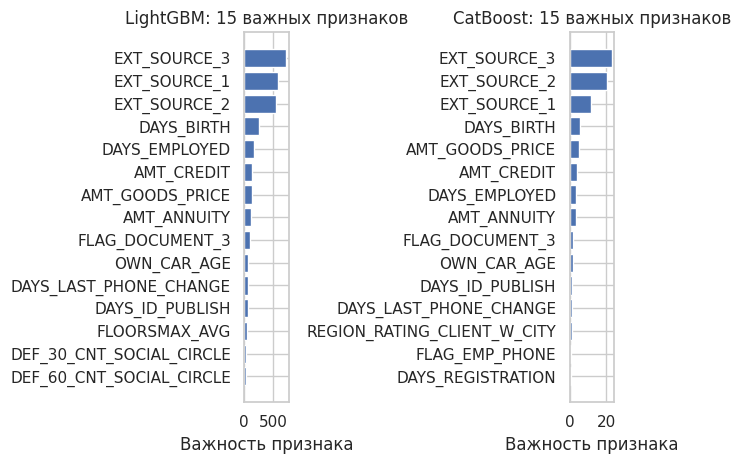

 0.20
 37 важных признаков из 104
CatBoost на отобранных признаках: PR AUC = 0.2353
Изменение качества: 0.0010



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
import lightgbm as lgb
from catboost import CatBoostClassifier

df = pd.read_csv("/content/application_train.csv")
y = df['TARGET']
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)

X_num = X.select_dtypes(include=['int64', 'float64'])
X_num = X_num.fillna(X_num.median())

X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, test_size=0.3, random_state=0, stratify=y
)

print(f"Исходные данные: {X_train.shape[1]} числовых признаков")
print()

lgb_params = {
    'n_estimators': 500,
    'max_depth': 3,
    'learning_rate': 0.01,
    'random_state': 0,
    'verbose': -1
}

cb_params = {
    'iterations': 300,
    'depth': 6,
    'learning_rate': 0.05,
    'random_seed': 0,
    'verbose': 0
}

def plot_feature_importance(importance_values, feature_names, model_name, ax):
    sorted_idx = np.argsort(importance_values)
    top_n = min(15, len(sorted_idx))

    # Для графика берем N признаков
    top_features = feature_names[sorted_idx[-top_n:]]
    top_importance = importance_values[sorted_idx[-top_n:]]

    # Горизонтальный bar plot
    bars = ax.barh(range(top_n), top_importance)
    ax.set_yticks(range(top_n))
    ax.set_yticklabels(top_features)
    ax.set_xlabel('Важность признака')
    ax.set_title(f'{model_name}: {top_n} важных признаков')

    return pd.DataFrame({
        'feature': feature_names[sorted_idx[::-1]],  # отсортировано по убыванию
        'importance': importance_values[sorted_idx[::-1]]
    })

# LightGBM
print("LightGBM: Обучение и анализ важности признаков")

lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train, y_train)
y_pred_lgb_full = lgb_model.predict_proba(X_test)[:, 1]
lgb_score_full = average_precision_score(y_test, y_pred_lgb_full)
print(f"LightGBM на всех признаках: PR AUC = {lgb_score_full:.4f}")

lgb_importance = lgb_model.feature_importances_
lgb_feature_importance_df = plot_feature_importance(
    lgb_importance,
    X_train.columns.values,
    "LightGBM",
    plt.subplot(1, 2, 1)
)

lgb_importances_sorted = np.sort(lgb_importance)[::-1]
cumulative_sum = np.cumsum(lgb_importances_sorted) / np.sum(lgb_importances_sorted)

threshold_idx = np.where(cumulative_sum >= 0.95)[0][0]
threshold_value = lgb_importances_sorted[threshold_idx]

print(f" {threshold_value:.2f}")
important_features_lgb = lgb_feature_importance_df[lgb_feature_importance_df['importance'] >= threshold_value]
print(f" {len(important_features_lgb)} важных признаков из {X_train.shape[1]}")

# 4.4 Обучаем LightGBM только на важных признаках
selected_features_lgb = important_features_lgb['feature'].values
X_train_lgb_selected = X_train[selected_features_lgb]
X_test_lgb_selected = X_test[selected_features_lgb]

lgb_model_selected = lgb.LGBMClassifier(**lgb_params)
lgb_model_selected.fit(X_train_lgb_selected, y_train)
y_pred_lgb_selected = lgb_model_selected.predict_proba(X_test_lgb_selected)[:, 1]
lgb_score_selected = average_precision_score(y_test, y_pred_lgb_selected)

print(f"LightGBM на отобранных признаках: PR AUC = {lgb_score_selected:.4f}")
print(f"Изменение качества: {lgb_score_selected - lgb_score_full:.4f}")
print()

# CatBoost и анализ важности признаков
print("CatBoost: Обучение и анализ важности признаков")

cb_model = CatBoostClassifier(**cb_params)
cb_model.fit(X_train, y_train, verbose=False)
y_pred_cb_full = cb_model.predict_proba(X_test)[:, 1]
cb_score_full = average_precision_score(y_test, y_pred_cb_full)
print(f"CatBoost на всех признаках: PR AUC = {cb_score_full:.4f}")

cb_importance = cb_model.get_feature_importance()
cb_feature_importance_df = plot_feature_importance(
    cb_importance,
    X_train.columns.values,
    "CatBoost",
    plt.subplot(1, 2, 2)
)

plt.tight_layout()
plt.show()

cb_importances_sorted = np.sort(cb_importance)[::-1]
cumulative_sum_cb = np.cumsum(cb_importances_sorted) / np.sum(cb_importances_sorted)

threshold_idx_cb = np.where(cumulative_sum_cb >= 0.95)[0][0]
threshold_value_cb = cb_importances_sorted[threshold_idx_cb]

print(f" {threshold_value_cb:.2f}")
important_features_cb = cb_feature_importance_df[cb_feature_importance_df['importance'] >= threshold_value_cb]
print(f" {len(important_features_cb)} важных признаков из {X_train.shape[1]}")

selected_features_cb = important_features_cb['feature'].values
X_train_cb_selected = X_train[selected_features_cb]
X_test_cb_selected = X_test[selected_features_cb]

cb_model_selected = CatBoostClassifier(**cb_params)
cb_model_selected.fit(X_train_cb_selected, y_train, verbose=False)
y_pred_cb_selected = cb_model_selected.predict_proba(X_test_cb_selected)[:, 1]
cb_score_selected = average_precision_score(y_test, y_pred_cb_selected)

print(f"CatBoost на отобранных признаках: PR AUC = {cb_score_selected:.4f}")
print(f"Изменение качества: {cb_score_selected - cb_score_full:.4f}")
print()


results = pd.DataFrame({
    'Модель': ['LightGBM', 'LightGBM (отбор)', 'CatBoost', 'CatBoost (отбор)'],
    'Количество признаков': [
        X_train.shape[1],
        len(selected_features_lgb),
        X_train.shape[1],
        len(selected_features_cb)
    ],
    'PR AUC': [lgb_score_full, lgb_score_selected, cb_score_full, cb_score_selected],
    'Изменение качества': [
        0,
        lgb_score_selected - lgb_score_full,
        0,
        cb_score_selected - cb_score_full
    ]
})

